# The Financial Impacts of ESG Sustainability Scores

### The purpose of this study is to see if sustainability ratings on yahoofinance.com have any relationships to perfomance or value metrics

##### Data for this study was scraped from yahoofinance.com using Scrapy
##### We will look at companies sorted by industry and sector

In [ ]:
#companies with higher sustainability are worth the most?
#what do you get for being sustainable?
##worth more? (enterprise value and/or market cap, profitablity, other value metrics)
##higher trading volume?
#sort by sector, run regression analysis with esg as factor vs. value merics as independent variable

In [435]:
import pandas as pd
import numpy as np
import re

'''read the csv containing yahoo finance data into a pandas dataframe'''

df = pd.read_csv("yahoofinance.csv")
df.head()

,avg_vol_3month,c_level,company_name,e_score,ebitda,employees,enterprise_value,fifty_day_moving_avg,forward_pe,g_score,...,return_on_equity,revenue,s_score,sector,ticker_name,tot_cash,tot_debt,tot_esg_score,trailing_pe,twohundred_day_moving_avg
0,861.2k,NaN,"10x Genomics, Inc.",NaN,-11.49M,670,9.05B,88.93,,NaN,...,-22.56%,264.22M,NaN,Healthcare,TXG,372.43M,59.62M,NaN,,79.70
1,155.39k,NaN,"111, Inc.",NaN,NaN,"1,932",504.34M,6.61,,NaN,...,-57.58%,NaN,NaN,Healthcare,YI,NaN,NaN,NaN,,6.74
2,5.28k,NaN,"1347 Property Insurance Holdings, Inc.",NaN,NaN,2,17.26M,4.5475,,NaN,...,-9.31%,-3.54M,NaN,Financial Services,PIH,27.67M,NaN,NaN,545.00,4.9256
3,1.64k,NaN,"1347 Property Insurance Holdings, Inc.",NaN,NaN,2,,24.99,,NaN,...,-9.31%,-3.54M,NaN,Financial Services,PIHPP,27.67M,NaN,NaN,,24.73
4,88.7k,NaN,180 Degree Capital Corp.,NaN,-4.8M,NaN,,1.7626,,NaN,...,14.87%,791.3k,NaN,Financial Services,TURN,11.33M,NaN,NaN,4.17,1.7393


##### We first have to inspect the dataset and clean up anything that might impede the integrity of the data.

1) Changing strings to numbers or floats where appropriate -- K,M,B,T are used in this dataset to indicate thousands, millions, billions, and trillions, respectively

2) Convert empty strings to None.

In [436]:
df.columns

Index(['avg_vol_3month', 'c_level', 'company_name', 'e_score', 'ebitda',
       'employees', 'enterprise_value', 'fifty_day_moving_avg', 'forward_pe',
       'g_score', 'held_by_insiders', 'held_by_institutions', 'hq', 'industry',
       'market_cap', 'peg_ratio', 'profit_margin', 'return_on_assets',
       'return_on_equity', 'revenue', 's_score', 'sector', 'ticker_name',
       'tot_cash', 'tot_debt', 'tot_esg_score', 'trailing_pe',
       'twohundred_day_moving_avg'],
      dtype='object')

In [437]:
'''define a function to process the numeric data currently stored as a string'''

def string_to_num (i):
    if i != None and type(i) != float:
            i = i.replace(',','')
            if len(i)>1:
                num = float(i[:-1])
                mult = i[-1]
                if mult == 'k' or mult =='K':
                    i = num*1e4
                if mult == 'M':
                    i = num*1e6
                if mult == 'B':
                    i = num*1e9
                if mult == 'T':
                    i = num*1e12
            else:
                i = float(i)
    return i

In [438]:
#test:
x = ['9.05B','12k','1.5M','69T', None, '3.456B', '12,345', np.nan]
list(map(string_to_num, x))

[9050000000.0,
 120000.0,
 1500000.0,
 69000000000000.0,
 None,
 3456000000.0,
 '12345',
 nan]

In [439]:
df = df.replace('',np.nan)

In [440]:
df = df.replace(' ',np.nan)

In [441]:
df['enterprise_value'] = df['enterprise_value'].apply(string_to_num)
df['avg_vol_3month'] = df['avg_vol_3month'].apply(string_to_num)
df['c_level'] = df['c_level'].apply(string_to_num)
df['e_score'] = df['e_score'].apply(string_to_num)
df['ebitda'] = df['ebitda'].apply(string_to_num)
df['employees'] = df['employees'].apply(string_to_num)
df['avg_vol_3month'] = df['avg_vol_3month'].apply(string_to_num)
df['fifty_day_moving_avg'] = df['fifty_day_moving_avg'].apply(string_to_num)
df['forward_pe'] = df['forward_pe'].apply(string_to_num)
df['g_score'] = df['g_score'].apply(string_to_num)
df['market_cap'] = df['market_cap'].apply(string_to_num)
df['peg_ratio'] = df['peg_ratio'].apply(string_to_num)
df['revenue'] = df['revenue'].apply(string_to_num)
df['s_score'] = df['s_score'].apply(string_to_num)
df['tot_cash'] = df['tot_cash'].apply(string_to_num)
df['tot_debt'] = df['tot_debt'].apply(string_to_num)
df['tot_esg_score'] = df['tot_esg_score'].apply(string_to_num)
df['trailing_pe'] = df['trailing_pe'].apply(string_to_num)
df['twohundred_day_moving_avg'] = df['twohundred_day_moving_avg'].apply(string_to_num)

In [442]:
'''define a function to clean percentages that are stored as strings'''

def string_to_percent(i):
    if i != None and type(i) != float:
        i = i.replace(',','')
        i = float(i[:-1])
        i = i/100
    return i

In [443]:
df['return_on_assets'] = df['return_on_assets'].apply(string_to_percent)
df['return_on_equity'] = df['return_on_equity'].apply(string_to_percent)
df['profit_margin'] = df['profit_margin'].apply(string_to_percent)
df['held_by_insiders'] = df['held_by_insiders'].apply(string_to_percent)
df['held_by_institutions'] = df['held_by_institutions'].apply(string_to_percent)

In [447]:
'''finally, drop all rows that do not include ESG ratings, since that is the scope of this project

    I will call the final dataset 'data' to distinguish from raw data'''

data = df.dropna(subset=['tot_esg_score']).set_index('ticker_name')
data.sample(5)

,avg_vol_3month,c_level,company_name,e_score,ebitda,employees,enterprise_value,fifty_day_moving_avg,forward_pe,g_score,...,return_on_assets,return_on_equity,revenue,s_score,sector,tot_cash,tot_debt,tot_esg_score,trailing_pe,twohundred_day_moving_avg
ticker_name,,,,,,,,,,,,,,,,,,,,,
VIAC,1.236e+07,3.0,ViacomCBS Inc.,0.1,4.57e+09,23990,3.535000e+10,23.81,6.89,8.7,...,0.0710,0.2052,2.738000e+10,10.1,Communication Services,5.89e+08,2.038000e+10,19.0,8.46,23.32
NTES,9.284e+06,2.0,"NetEase, Inc.",0.1,NaN,20797,5.651000e+10,439.90,24.75,7.4,...,0.0864,0.2277,NaN,11.0,Communication Services,NaN,NaN,19.0,29.55,366.71
AAPL,3.48e+07,3.0,Apple Inc.,0.5,7.731e+10,137000,1.630000e+12,366.21,24.51,10.1,...,0.1238,0.6209,2.679800e+11,13.0,Technology,9.405e+10,1.187600e+11,24.0,29.04,311.86
MRVL,9.21e+06,2.0,Marvell Technology Group Ltd.,5.8,4.0695e+08,5633,2.443000e+10,35.35,38.17,7.5,...,-0.0097,0.1928,2.730000e+09,8.8,Technology,6.6755e+08,1.600000e+09,22.0,15.77,27.85
LNT,1.47e+06,2.0,Alliant Energy Corporation,19.3,1.33e+09,3597,1.969000e+10,49.33,23.31,6.7,...,0.0290,0.1138,3.580000e+09,10.1,Utilities,5.52e+07,6.460000e+09,36.0,21.30,51.43




### The DataFrame is now clean and ready for analysis!



Initial Observations:

1) There are only 153 companies in this dataset with ESG ratings. Is it possible other exchanges besides NYSE have more companies with these ratings? I was expecting to see more since this has been a topic discussed widely, so this itself is interesting.

2) There is not an even distribution of companies with ESG ratings by sector. When grouping, we will want to drop outlyers

In [449]:
data.sector.value_counts()

Technology                45
Communication Services    23
Healthcare                21
Financial Services        19
Consumer Cyclical         16
Industrials               12
Real Estate                7
Consumer Defensive         5
Utilities                  2
Basic Materials            2
Energy                     1
Name: sector, dtype: int64

In [450]:
len(data.company_name)

153

Are there any trends in which companies have ESG ratings and which do not?

In [ ]:
#colors = 
sns.barplot(x='ticker_name',y='enterprise_value',hue='tot_esg_score', data=df)

To begin statistical analysis, I will use pandas, numpy, and scipy methods to see if there are correlations between ESG ratings and financial performance.

In [492]:
data.columns

Index(['avg_vol_3month', 'c_level', 'company_name', 'e_score', 'ebitda',
       'employees', 'enterprise_value', 'fifty_day_moving_avg', 'forward_pe',
       'g_score', 'held_by_insiders', 'held_by_institutions', 'hq', 'industry',
       'market_cap', 'peg_ratio', 'profit_margin', 'return_on_assets',
       'return_on_equity', 'revenue', 's_score', 'sector', 'tot_cash',
       'tot_debt', 'tot_esg_score', 'trailing_pe',
       'twohundred_day_moving_avg'],
      dtype='object')

In [452]:
data.avg_vol_3month = data.avg_vol_3month.apply(float)
data.fifty_day_moving_avg = data.fifty_day_moving_avg.apply(float)
data.twohundred_day_moving_avg = data.twohundred_day_moving_avg.apply(float)
data.employees = data.employees.apply(float)
data.peg_ratio = data.peg_ratio.apply(float)
data.tot_cash = data.tot_cash.apply(float)
data.tot_debt = data.tot_debt.apply(float)

In [555]:
from scipy import stats

# dropped = df.drop(['company_name','hq','industry','sector',],axis=1)
# correlations = pd.DataFrame([stats.pearsonr(dropped[c],dropped.tot_esg_score) for c in dropped.columns])
# correlations.index = dropped.columns

correlations = data.corr(method="pearson")['c_level'].sort_values(ascending=False).drop(['c_level'])

In [556]:
correlations

revenue                      0.381108
tot_cash                     0.345417
enterprise_value             0.322559
market_cap                   0.315631
employees                    0.301294
tot_esg_score                0.293431
tot_debt                     0.278347
s_score                      0.271542
g_score                      0.218375
avg_vol_3month               0.193467
e_score                      0.172249
held_by_insiders             0.156294
fifty_day_moving_avg         0.155214
twohundred_day_moving_avg    0.149748
return_on_assets             0.116955
return_on_equity            -0.014529
peg_ratio                   -0.107344
profit_margin               -0.107982
held_by_institutions        -0.308591
Name: c_level, dtype: float64

No significant correlations exist between ESG scores and performance or value metrics.

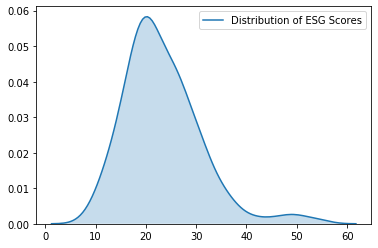

In [455]:
import seaborn as sns

sns.kdeplot(data['tot_esg_score'], shade=True, label = "Distribution of ESG Scores")

The graph above helps us to understand why correlations are low between ESG and other metrics. A true ranking that compares muliple companies to eachother would not have such a steep curve. Lets see how many companies fall within a single standard deviation of the mean ESG Score.

In [456]:
data['tot_esg_score'].agg(['max','min','mean','std'])

max     54.000000
min      9.000000
mean    23.294118
std      7.661320
Name: tot_esg_score, dtype: float64

In [458]:
counter = 0
for i in data['tot_esg_score']:
    if i > data['tot_esg_score'].mean()-data['tot_esg_score'].std() and i < data['tot_esg_score'].mean()+data['tot_esg_score'].std():
        counter += 1
counter/data['tot_esg_score'].count()

0.7189542483660131

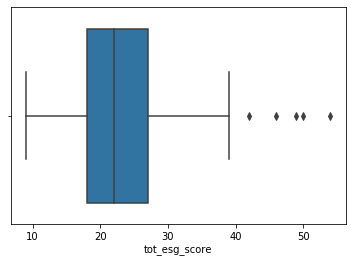

In [459]:
sns.boxplot('tot_esg_score', data=data)

NameError: name 'linear' is not defined

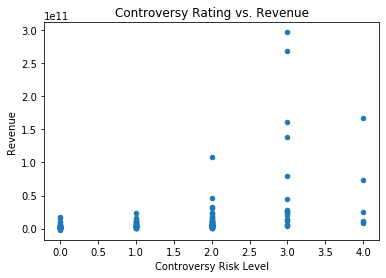

In [567]:
outliers = data[['c_level','revenue']].dropna()
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
outliers
data.plot.scatter('c_level','revenue',)
plot.xlabel('Controversy Risk Level')
plot.title('Controversy Rating vs. Revenue')
plot.ylabel('Revenue')
plot.xscale(1)

In [434]:
df.enterprise_value.sum()

10813770000000.0

In [445]:
10813770000000.0/15318899613600.0

0.705910363848825